# Exploratory  data analysis

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme

In [ ]:
train = pd.read_csv("drive/MyDrive/bank_train.csv")
test = pd.read_csv("drive/MyDrive/bank_test.csv")

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,29,admin.,married,secondary,no,1489,yes,no,cellular,20,apr,1,-1,0,unknown,no
1,33,admin.,single,tertiary,no,3379,no,no,cellular,20,nov,3,-1,0,unknown,no
2,30,management,married,tertiary,no,3134,yes,no,cellular,17,jul,1,-1,0,unknown,no
3,33,admin.,divorced,secondary,no,294,yes,no,cellular,8,may,1,-1,0,unknown,yes
4,42,technician,married,tertiary,no,644,yes,no,unknown,7,may,1,-1,0,unknown,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29387 entries, 0 to 29386
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         29387 non-null  int64 
 1   job         29387 non-null  object
 2   marital     29387 non-null  object
 3   education   29387 non-null  object
 4   default     29387 non-null  object
 5   balance     29387 non-null  int64 
 6   housing     29387 non-null  object
 7   loan        29387 non-null  object
 8   contact     29387 non-null  object
 9   day         29387 non-null  int64 
 10  month       29387 non-null  object
 11  campaign    29387 non-null  int64 
 12  pdays       29387 non-null  int64 
 13  previous    29387 non-null  int64 
 14  poutcome    29387 non-null  object
 15  subscribed  29387 non-null  object
dtypes: int64(6), object(10)
memory usage: 3.6+ MB


In [ ]:
train.describe()

,age,balance,day,campaign,pdays,previous
count,29387.000000,29387.000000,29387.000000,29387.000000,29387.000000,29387.000000
mean,40.914384,1353.010311,15.862014,2.792697,39.904822,0.580699
std,10.623675,3043.778835,8.328638,3.155119,99.664703,1.897759
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1411.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,854.000000,38.000000


In [ ]:
# check if there are any missing values
train.isnull().mean()

age           0.0
job           0.0
marital       0.0
education     0.0
default       0.0
balance       0.0
housing       0.0
loan          0.0
contact       0.0
day           0.0
month         0.0
campaign      0.0
pdays         0.0
previous      0.0
poutcome      0.0
subscribed    0.0
dtype: float64

In [ ]:
#check if there are any duplicated values
train[train.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
18852,33,management,single,tertiary,no,0,no,no,cellular,28,aug,10,-1,0,unknown,no
19661,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,-1,0,unknown,no
20922,59,retired,married,primary,no,0,no,no,cellular,22,aug,1,-1,0,unknown,no
22600,32,management,single,tertiary,no,0,no,no,cellular,29,aug,2,-1,0,unknown,no
23706,30,technician,single,tertiary,no,0,no,no,cellular,22,aug,2,-1,0,unknown,no
26657,44,services,single,secondary,no,0,yes,no,unknown,14,may,1,-1,0,unknown,no
27032,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,-1,0,unknown,no


In [ ]:
# removing dupliatevalues
train.drop_duplicates(inplace=True)
train.shape

(29380, 16)

In [ ]:
X_train = pd.DataFrame(train.iloc[:,:-1])
y_train = pd.DataFrame(train.iloc[:,-1]) 
X_test = pd.DataFrame(test.iloc[:,1:])
print(X_train.shape)
print(y_train.shape)

(29380, 15)
(29380, 1)


## Label

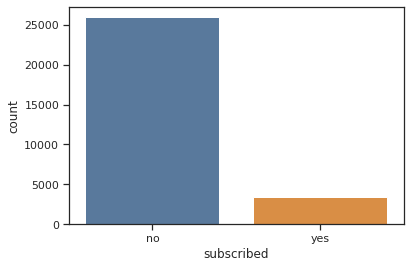

In [ ]:
sns.countplot(x='subscribed', data=y_train)

It can be seen that this dataset is imbalanced. Therefore we can try undersampling or oversampling later.

In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
encorder = LabelEncoder().fit(y_train)
y_train = pd.DataFrame(encorder.transform(y_train))

## Numerical predictors

### Univariate analysis

In [ ]:
def distplots(X, kde=True):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.histplot(X.iloc[:,i], ax=ax, stat='density', kde=False, alpha= 0.9, edgecolor ='black')
            sns.kdeplot(X.iloc[:,i], ax=ax, alpha= 0.0, color='#333333')
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

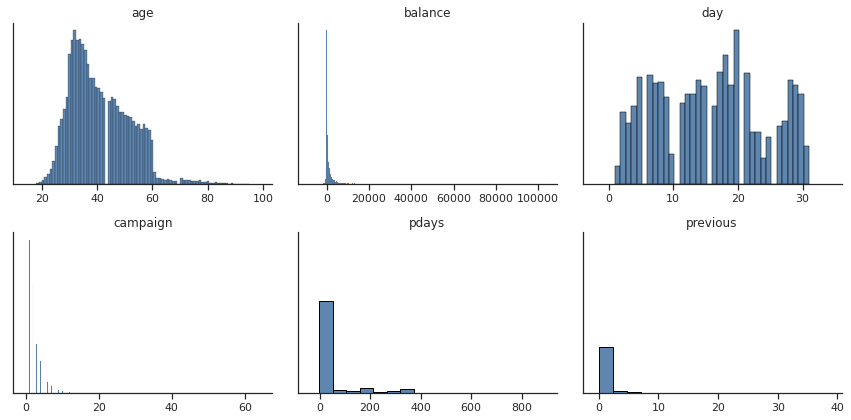

In [ ]:
num_predictors = X_train.loc[:,X_train.dtypes == "int64"]

distplots(num_predictors) 
plt.show()

### Bivariate analysis

In [ ]:
def regplots(X, y):
    colors = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
    sns.set_palette(colors) # set custom color scheme

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(11/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:          
            sns.regplot(X.iloc[:,i], y,  ci=None, logistic=True, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.5},  color=colors[i % 10], ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_title(labels[i])
            ax.set_xlim(X.iloc[:,i].min(),X.iloc[:,i].max())
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()

    return fig, axes

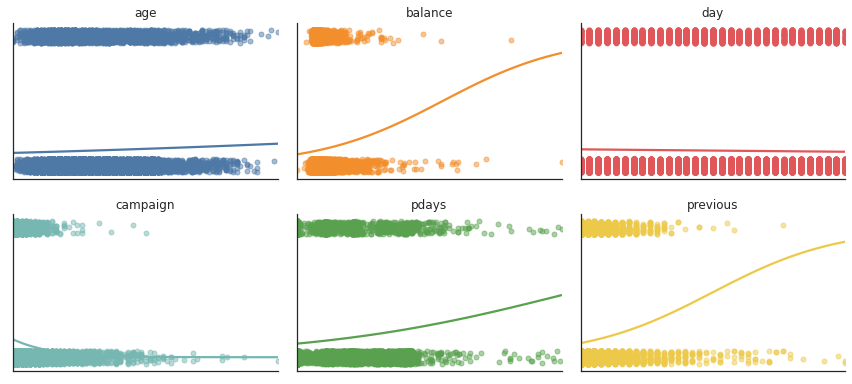

In [ ]:
fig, ax = regplots(num_predictors, y_train)
plt.show()

## Correlation Matrix

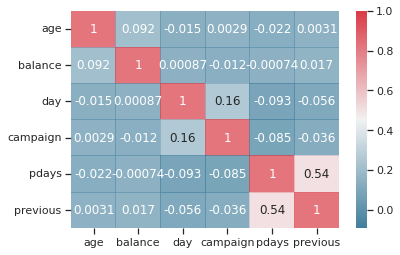

In [ ]:
sns.heatmap(num_predictors.corr(), cmap=sns.diverging_palette(230, 10, n=1001), alpha=0.7, annot=True)

## Categorical predictors

### Univariate analysis

In [ ]:
cat_predictors = X_train.loc[:,X_train.dtypes == "object"]
cat_predictors.columns.values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'], dtype=object)

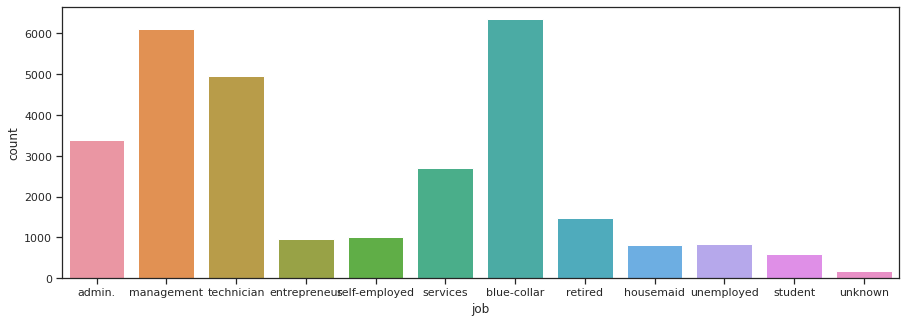

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='job', data=X_train)

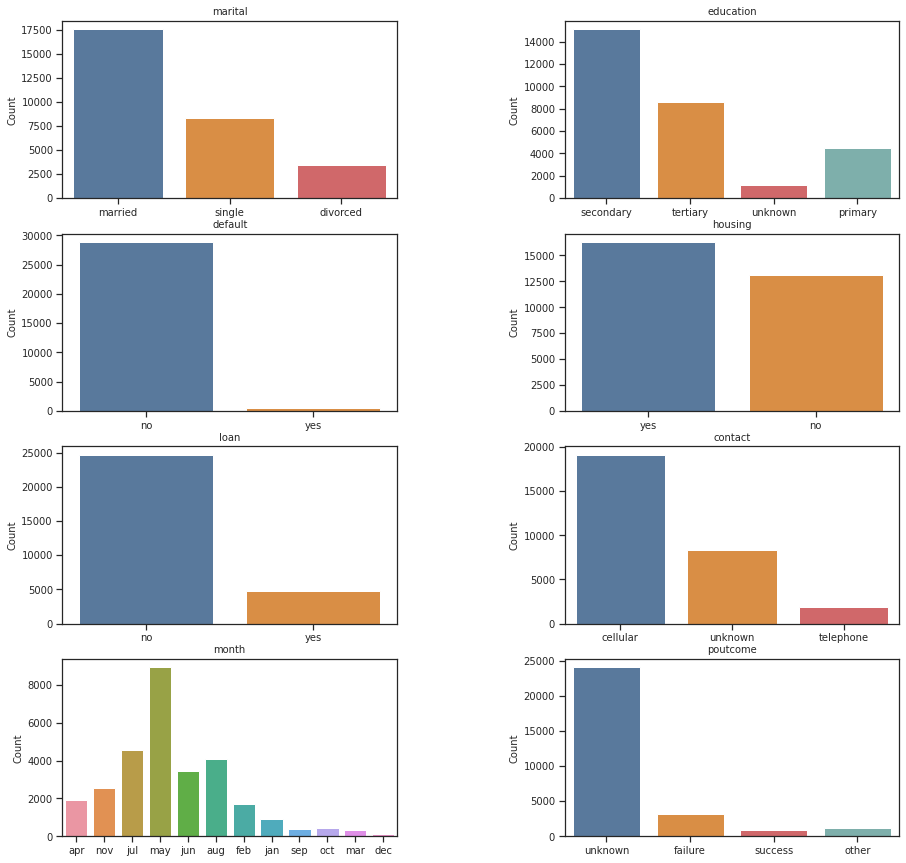

In [ ]:
# Default, has credit in default 
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
columns = ['marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']

for i in list(range(0,8)):
  sns.countplot(x = columns[i], data = X_train, ax = ax[i])
  ax[i].set_title(columns[i], fontsize=10)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('Count', fontsize=10)
  ax[i].tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

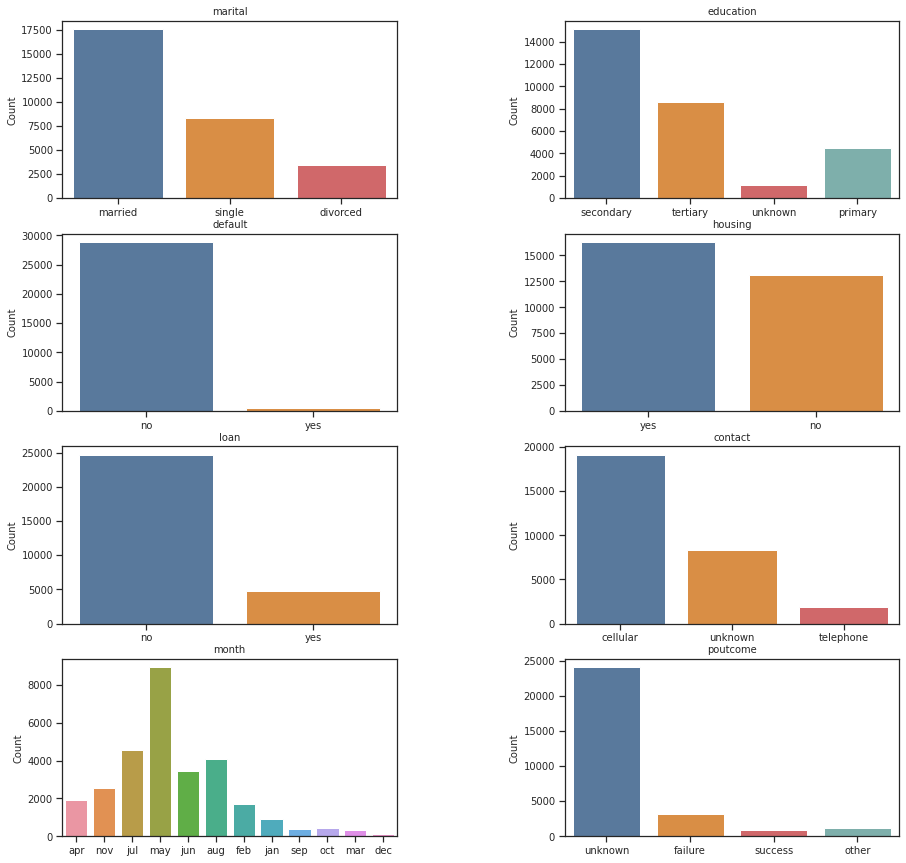

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
columns = ['marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']

for i in list(range(0,8)):
  sns.countplot(x = columns[i], data = X_train, ax = ax[i])
  ax[i].set_title(columns[i], fontsize=10)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('Count', fontsize=10)
  ax[i].tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

### Bivariate analysis

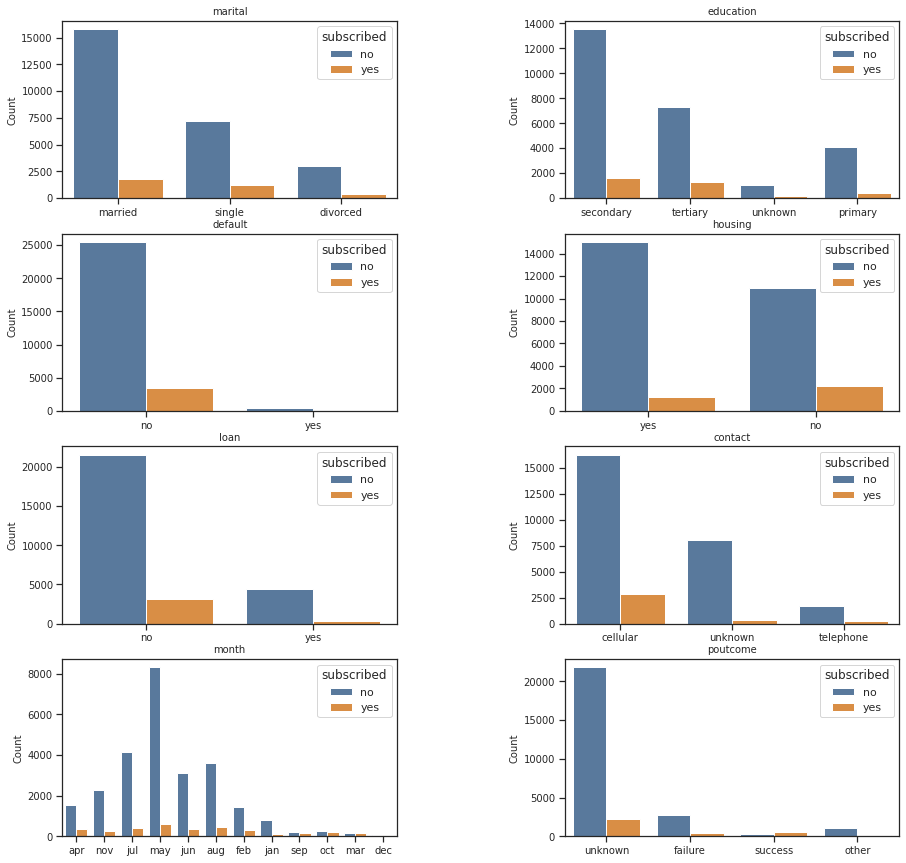

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
columns = ['marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']

for i in list(range(0,8)):
  sns.countplot(x = columns[i], data = X_train,hue= train["subscribed"], ax = ax[i])
  ax[i].set_title(columns[i], fontsize=10)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('Count', fontsize=10)
  ax[i].tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

# Feature Engineering

## Categorical predictors

### One-hot encoding

In [ ]:
cate = X_train.columns[X_train.dtypes == "object"].to_list()
cate

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
onehot = pd.get_dummies(X_train[cate],prefix=cate)
X_train_onehot = pd.concat([X_train,pd.DataFrame(onehot)],axis=1)
X_train_onehot.drop(cate,axis=1,inplace=True)

onehot = pd.get_dummies(X_test[cate],prefix=cate)
X_test_onehot = pd.concat([X_test,pd.DataFrame(onehot)],axis=1)
X_test_onehot.drop(cate,axis=1,inplace=True)

### Ordinal encoding
(for lightgbm and feature selection)

In [ ]:
X_train_ordinal = X_train
for i in cate:
    le = LabelEncoder()
    X_train_ordinal[i] = le.fit_transform(X_train_ordinal[i])

X_test_ordinal = X_test
for i in cate:
    le = LabelEncoder()
    X_test_ordinal[i] = le.fit_transform(X_test_ordinal[i])

## Feature Selection

Feature selection:
  1. Filter methods: variancethreshold, Chi-square, F, mutual informatio
  2. Embedding methods
  3. Wrapper methods(RFC)


### Embedded

Text(0.5, 1.0, 'Scores of different thresholds')

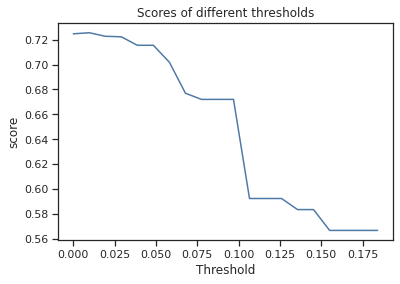

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
RFC_ = RandomForestClassifier(n_estimators =10,random_state=42, class_weight ="balanced")
threshold = np.linspace(0,(RFC_.fit(X_train_ordinal,y_train).feature_importances_).max(),20)
score = []
for i in threshold:
  x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X_train_ordinal,y_train)
  sc = cross_val_score(RFC_,x_embedded,y_train,cv=5,scoring="roc_auc").mean()
  score.append(sc)
plt.plot(threshold,score)
plt.xlabel("Threshold")
plt.ylabel("score")
plt.title("Scores of different thresholds")

From graph above, we do not need to do feature selection since the score will be lower after doing feature selection.

### Wrapper

Text(0.5, 1.0, 'Scores of the different number of features ')

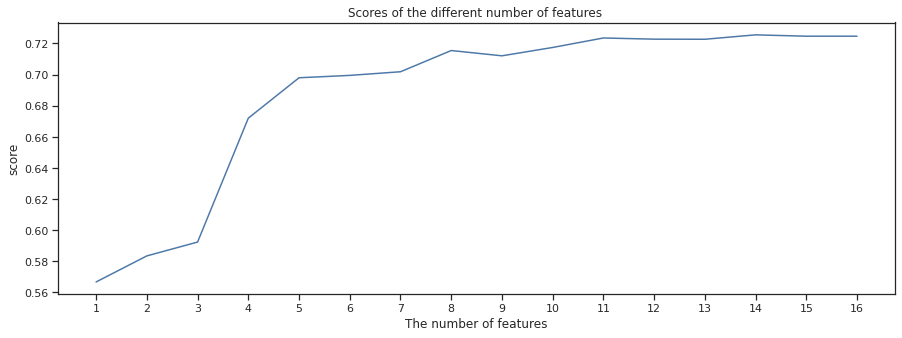

In [ ]:
from sklearn.feature_selection import RFE
score = []
for i in range(1,17,1):
  wrapper = RFE(RFC_,n_features_to_select=i, step=1).fit_transform(X_train_ordinal,y_train)
  sc = cross_val_score(RFC_,wrapper,y_train,cv=5,scoring= "roc_auc").mean()
  score.append(sc)
plt.figure(figsize=[15,5])
plt.plot(range(1,17,1),score)
plt.xticks(range(1,17,1))
plt.xlabel("The number of features")
plt.ylabel("score")
plt.title("Scores of the different number of features ")

Also, it can be seen that there is no need to do feature selection.

## Numerical predictors

### Normalization

In [ ]:
num = X_train_onehot.columns[X_train_onehot.dtypes == "int64"].to_list()
num

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

In [ ]:
## onehot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_onehot[num])
X_train_onehot[num] = scaler.transform(X_train_onehot[num])
X_test_onehot[num] = scaler.transform(X_test_onehot[num])


In [ ]:
## ordinal
scaler2 = MinMaxScaler().fit(X_train_ordinal[num])
X_train_ordinal[num] = scaler2.transform(X_train_ordinal[num])
X_test_ordinal[num] = scaler2.transform(X_test_ordinal[num])

In [ ]:
X_train = pd.DataFrame(X_train_onehot)
X_test = pd.DataFrame(X_test_onehot)
X_train2 = pd.DataFrame(X_train_ordinal)
X_test2 = pd.DataFrame(X_test_ordinal)

# Algorithms

## Decision Tree

In [ ]:

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def get_eval(model, para):
    #scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
    scoring = {'AUC': 'roc_auc'}
    grid = GridSearchCV(model, para, cv=10,
                          return_train_score=True, n_jobs= -1,verbose=2,scoring=scoring, refit="AUC")
    grid.fit(X_train, y_train)
    
    return grid

# This is a function can return the fitted model before gridsearch CV

def print_eval(final_model):
    
    #y_pred = final_model.predict(valid)
    #print("Test set accuracy: {:.2f}".format(accuracy_score(y_valid, y_pred[0:2000])))
    
   
    print("Training set AUC: {:.2f}\n".format(final_model.score(X_train, y_train)))
    
    print("The Best cross-validation : {}, AUC: {:.2f}".format(final_model.best_estimator_, final_model.best_score_))
    
    
# This is a function can print the test score and training score, also the best CV score and best hyper-parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

parameters_DTC = {"criterion":["gini","entropy"],"max_leaf_nodes":list(range(40,70,5)),"splitter":["best","random"],"class_weight":["balanced"]}
DTC = get_eval(DecisionTreeClassifier(),parameters_DTC)
print_eval(DTC)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   35.8s finished


Training set AUC: 0.78

The Best cross-validation : DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=50, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random'), AUC: 0.77


In [ ]:
output_DT = model_DT.predict_proba(X_test)[:,1]

In [ ]:
df = {
        'id':test_data["id"],
        'subscribed':output_DT}
y_test = pd.DataFrame(df,
               columns=['id','subscribed'])
y_test_DT = y_test.set_index(["id"])
y_test_DT[0:5]

,subscribed
id,
0,0.216835
1,0.320528
2,0.281757
3,0.000000
4,0.000000


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters_rf = {
    "max_features": [6,7,8],
    "max_depth":[5,10,15],
    "n_estimators":[300],
    "class_weight":["balanced"]
}
rf = get_eval(RandomForestClassifier(),parameters_rf)
print_eval(rf)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Training set AUC: 0.85

The Best cross-validation : RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       n_estimators=300), AUC: 0.78


In [ ]:
output_RF = model_RF.predict_proba(X_test)[:,1]

In [ ]:
df = {
        'id':test_data["id"],
        'subscribed':output_RF}
y_test = pd.DataFrame(df,
               columns=['id','subscribed'])
y_test_RF = y_test.set_index(["id"])
y_test_RF

,subscribed
id,
0,0.120716
1,0.387649
2,0.197965
3,0.160539
4,0.312300
...,...
15819,0.314980
15820,0.187068
15821,0.171357


## LightGBM

In [ ]:
from sklearn.metrics import roc_auc_score
import optuna
import lightgbm as lgb
X_train_lgb, X_valid, y_train_lgb, y_valid = train_test_split(X_train2, y_train,test_size=0.2,random_state=42,stratify=y_train)

In [ ]:
train_data = lgb.Dataset(X_train_lgb, y_train_lgb)
valid_data = lgb.Dataset(X_valid, y_valid, reference = train_data)

In [ ]:
categorical_index = [1,2,3,4,6,7,8,10,14]

In [ ]:
def objective(trial):
  
    
    params = {
        "objective":"binary",
        "metric":"auc",
        "n_esitimators" : 2000,
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "num_leaves": trial.suggest_int("num_leaves", 2, 50),
        "max_depth": trial.suggest_int("max_depth", 3, 16),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "is_unbalance":True
    }
    
    gbm = lgb.train(params, train_data, categorical_feature = categorical_index, num_boost_round=1000) 
    preds = gbm.predict(X_valid)
    auc = roc_auc_score(y_valid, preds)
    return auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

print("Number of finished trials:", len(study.trials))
print("Best trial:", study.best_trial.params)

[I 2021-11-09 13:23:27,179] A new study created in memory with name: no-name-9d144674-eefa-4c74-86ed-179e2664de1f
[I 2021-11-09 13:23:32,579] Trial 0 finished with value: 0.78013494916713 and parameters: {'learning_rate': 0.00046781145508521604, 'lambda_l1': 4.99453465423979e-05, 'num_leaves': 37, 'max_depth': 12, 'feature_fraction': 0.8273560007049163, 'bagging_fraction': 0.45275301709070587, 'bagging_freq': 5}. Best is trial 0 with value: 0.78013494916713.
[I 2021-11-09 13:23:36,792] Trial 1 finished with value: 0.7764328683365906 and parameters: {'learning_rate': 0.0003305223423295881, 'lambda_l1': 0.00016464589052875045, 'num_leaves': 13, 'max_depth': 10, 'feature_fraction': 0.796288129637065, 'bagging_fraction': 0.807558616822409, 'bagging_freq': 7}. Best is trial 0 with value: 0.78013494916713.
[I 2021-11-09 13:23:43,460] Trial 2 finished with value: 0.7894529078732674 and parameters: {'learning_rate': 0.0020353966899482024, 'lambda_l1': 0.12583810648806137, 'num_leaves': 49, 'ma

Number of finished trials: 10
Best trial: {'learning_rate': 0.014076806213259851, 'lambda_l1': 0.1351077863379871, 'num_leaves': 28, 'max_depth': 4, 'feature_fraction': 0.9520990984065353, 'bagging_fraction': 0.8176060306422773, 'bagging_freq': 7}


In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))

print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 10
Best trial:
  Value: 0.7910691712538774
  Params: 
    learning_rate: 0.014076806213259851
    lambda_l1: 0.1351077863379871
    num_leaves: 28
    max_depth: 4
    feature_fraction: 0.9520990984065353
    bagging_fraction: 0.8176060306422773
    bagging_freq: 7


In [ ]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

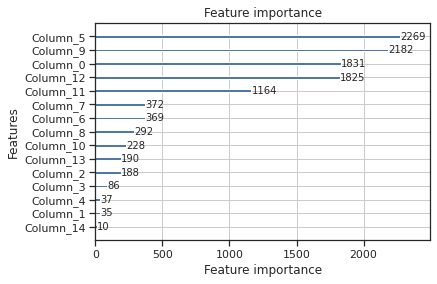

In [ ]:
lgb.plot_importance(gbm)

In [ ]:
params = {
    "n_estimators":5000
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    "learning_rate": 0.014076806213259851,
    "lambda_l1": 0.1351077863379871,
    'num_leaves': 28,
    "max_depth": 4,
    "feature_fraction":0.9520990984065353,
    "bagging_fraction": 0.8176060306422773,
    "bagging_freq": 7,
    'verbose': -1,
    "is_unbalance":True
}

In [ ]:
evals_result={}
gbm = lgb.train(params,
                train_data,
                valid_sets = valid_data,
                categorical_feature = categorical_index,
                num_boost_round= 200,
                early_stopping_rounds= 100,
                evals_result=evals_result)

[1]	valid_0's auc: 0.723364
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.731434
[3]	valid_0's auc: 0.745302
[4]	valid_0's auc: 0.745177
[5]	valid_0's auc: 0.752543
[6]	valid_0's auc: 0.753053
[7]	valid_0's auc: 0.75476
[8]	valid_0's auc: 0.756044
[9]	valid_0's auc: 0.755289
[10]	valid_0's auc: 0.754971
[11]	valid_0's auc: 0.75771
[12]	valid_0's auc: 0.760778
[13]	valid_0's auc: 0.760852
[14]	valid_0's auc: 0.762315
[15]	valid_0's auc: 0.761736
[16]	valid_0's auc: 0.760432
[17]	valid_0's auc: 0.761764
[18]	valid_0's auc: 0.761339
[19]	valid_0's auc: 0.761641
[20]	valid_0's auc: 0.761873
[21]	valid_0's auc: 0.761611
[22]	valid_0's auc: 0.761193
[23]	valid_0's auc: 0.761553
[24]	valid_0's auc: 0.76169
[25]	valid_0's auc: 0.762061
[26]	valid_0's auc: 0.761773
[27]	valid_0's auc: 0.762165
[28]	valid_0's auc: 0.761884
[29]	valid_0's auc: 0.762068
[30]	valid_0's auc: 0.761879
[31]	valid_0's auc: 0.761849
[32]	valid_0's auc: 0.761505
[33]	valid_0's auc: 0

In [ ]:
y_pred_gbm = gbm.predict(X_train2, num_iteration=gbm.best_iteration)

In [ ]:
y_pred_gbm

array([0.46036856, 0.52888775, 0.44519366, ..., 0.32112952, 0.15553765,
       0.39247767])

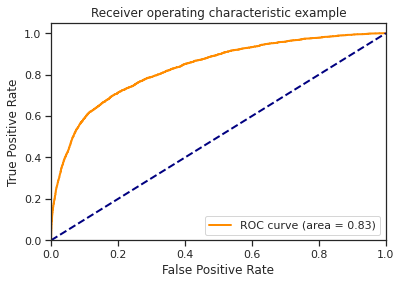

In [ ]:
## AUC plot for train set
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_pred_gbm, pos_label=1)
auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'roc_auc_score')

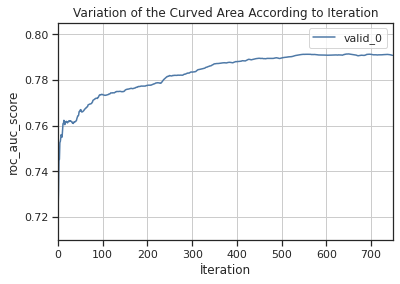

In [ ]:
ax = lgb.plot_metric(evals_result, metric='auc')
ax.set_title('Variation of the Curved Area According to Iteration')
ax.set_xlabel('İteration')
ax.set_ylabel('roc_auc_score')

Text(0, 0.5, 'Parametres')

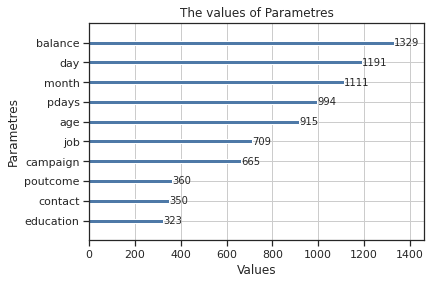

In [ ]:
ax = lgb.plot_importance(gbm, max_num_features=10)
ax.set_title('The values of Parametres')
ax.set_xlabel('Values')
ax.set_ylabel('Parametres')

In [ ]:
pred = pd.concat([pd.DataFrame(test.iloc[:,0]), pd.DataFrame(y_pred_gbm)],axis=1)

In [ ]:
pred

,id,0
0,0,0.201288
1,1,0.466768
2,2,0.380569
3,3,0.260854
4,4,0.502990
...,...,...
15819,15819,0.326322
15820,15820,0.173207
15821,15821,0.212181
15822,15822,0.320112


In [ ]:
pred.to_csv("pred.csv")

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores_lr = cross_val_score(lr, X_train, y_train, cv=10, scoring = 'roc_auc')
print("Cross-validation scores on each fold: {}".format(scores_lr)) 
print("Average cross-validation score: {:.2f}".format(scores_lr.mean()))

Cross-validation scores on each fold: [0.74596921 0.77104209 0.77476085 0.75746132 0.72514613 0.76876087
 0.77397527 0.76295476 0.75718003 0.76159877]
Average cross-validation score: 0.76


In [ ]:
parameters_lr = {
    "class_weight":['balanced', 'balanced_subsample'],
    "penalty": ['l1', 'l2'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_gridsearch = GridSearchCV(lr, parameters_lr, cv=10, scoring='roc_auc', n_jobs = -1, 
                          return_train_score=True)
lr_gridsearch.fit(X_train, y_train)

print("Training set AUC: {:.2f}\n".format(lr_gridsearch.score(X_train, y_train)))
print("Best parameters: {}".format(lr_gridsearch.best_params_))
print("Best cross-validation score: {:.2f}".format(lr_gridsearch.best_score_))

Training set AUC: 0.77

Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.76


In [ ]:
import time

start = time.time()
lr_best = LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='liblinear')
lr_best.fit(X_train, y_train)
end = time.time()
print(f"Runtime of the training is {end - start}")
start = time.time()
lr_pred_train = lr_best.predict(X_train)
lr_pred = lr_best.predict(X_test)
lr_pred_proba = lr_best.predict_proba(X_test)
end = time.time()
print(f"Runtime of the test is {end - start}")

# Accuracy
print("LogisticRegression Training Accuracy: {:.2f}".format(accuracy_score(lr_pred_train, y_train)))

Runtime of the training is 1.3334863185882568
Runtime of the test is 0.015455245971679688
LogisticRegression Training Accuracy: 0.76


In [ ]:
lr_pred_proba = pd.DataFrame(data=lr_pred_proba, columns={"unsubscribed":"", "subscribed":""})
lr_pred_proba = lr_pred_proba.drop("unsubscribed", axis=1)
lr_pred_proba.to_csv('lr_pred.csv')
lr_pred_proba

,subscribed
0,0.445528
1,0.525182
2,0.205892
3,0.468452
4,0.596223
...,...
15819,0.288262
15820,0.309661
15821,0.406936
15822,0.532503


## Stacking

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

import timeit
start = timeit.default_timer()

estimators = [('rf', RandomForestClassifier(n_estimators=400, max_depth=5, max_features=8, class_weight="balanced")),
              ('logreg', LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='liblinear'))]
params = {'rf__n_estimators': [300,350,400],
          'rf__max_depth': [5,10,15,20],
          'logreg__C': [1,3,5,7]
          }

sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

sc_grid_search = GridSearchCV(estimator=sc, param_grid=params, cv=5,scoring='roc_auc')
sc_grid_search.fit(X_train, y_train)

print("Training set AUC:{:3f}".format(sc_grid_search.score(X_train, y_train)))
print("Best parameters:{}".format(sc_grid_search.best_params_))
print("Best cv score:{}".format(sc_grid_search.best_score_))
print("Best estimator:\n{}".format(sc_grid_search.best_estimator_))

stop = timeit.default_timer()
print('Time: ', stop - start)  

Training set AUC:0.832378
Best parameters:{'logreg__C': 7, 'rf__max_depth': 10, 'rf__n_estimators': 400}
Best cv score:0.7822708902659338
Best estimator:
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_features=8,
                                                       n_estimators=400)),
                               ('logreg',
                                LogisticRegression(C=7, class_weight='balanced',
                                                   penalty='l1',
                                                   solver='liblinear'))],
                   final_estimator=LogisticRegression())
Time:  7167.814052


In [ ]:
stacking_predict_result = sc_grid_search.predict_proba(X_test)
sc_pred = pd.DataFrame(data=stacking_predict_result, columns={"unsubscribed":"", "subscribed":""})
sc_pred = sc_pred.drop("unsubscribed", axis=1)
sc_pred.to_csv('sc_pred.csv')

# Shap

In [ ]:
import shap
#col2 = train.columns.values.tolist()
#col2.remove('subscribed')
#feature_names = col

shap.initjs()
explainerDT = shap.TreeExplainer(model_DT)
explainerRF = shap.TreeExplainer(model_RF)

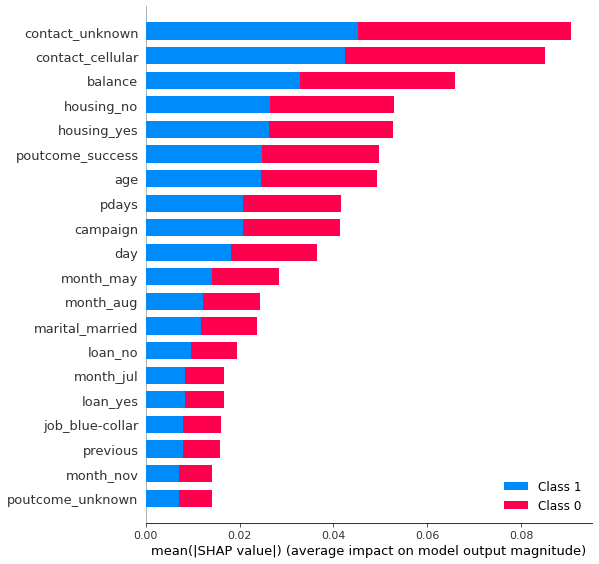

In [ ]:
#RF
x = test
shap_valuesRF = explainerRF.shap_values(x)
shap.summary_plot(shap_valuesRF, test[0:50], plot_type="bar",feature_names = col)

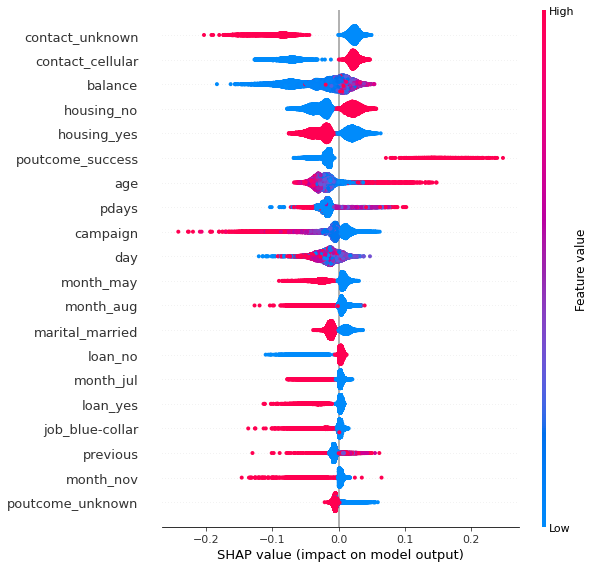

In [ ]:
shap.summary_plot(shap_valuesRF[1],test,feature_names = col)